Testing both the custom built ResNet9 and ResNet15

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
from google.colab import drive
import torch
from torch.utils.data import DataLoader
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install import_ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=fd14f250ef23f4ca18b073df946cb5f6d0772d59424f2d0fb5f74412673e241b
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Face mask'

/content/gdrive/My Drive/Colab Notebooks/Face mask


In [4]:
#importing modules
from CNN import ResNet9, ResNet15
from DataPreprocessing import Preprocessing

importing Jupyter notebook from CNN.ipynb
importing Jupyter notebook from DataPreprocessing.ipynb


In [5]:
device = torch.device('cuda')

In [6]:
#model and loading the state_dict
model15 = ResNet15(1,2).to(device)
model9 = ResNet9(1,2).to(device)
model15.load_state_dict(torch.load('state_dict_resnet15.pth'))
model9.load_state_dict(torch.load('state_dict_resnet9.pth'))

<All keys matched successfully>

In [8]:
data = Preprocessing(path={'test':'dataset/test',
                          'train':'dataset/train'})
_, test_ds = data.preprocessed_dataset()
test_dl = DataLoader(test_ds, 10, num_workers=3,
                      pin_memory=True)

In [9]:
#testing
accuracy9 = []
accuracy15 = []
for x, y in test_dl:
    x, y = x.to(device), y.to(device)
    _, label15 = torch.max(torch.exp(model15(x)), dim=1)
    _, label9 = torch.max(torch.exp(model9(x)), dim=1)
    acc9 = torch.sum(label9 == y).item()/len(y)
    acc15 = torch.sum(label15 == y).item()/len(y)
    accuracy9.append(acc9)
    accuracy15.append(acc15)
    print('ResNet9: {}, ResNet15: {}'.format(acc9, acc15))
    

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


ResNet9: 0.8, ResNet15: 1.0
ResNet9: 0.8, ResNet15: 1.0
ResNet9: 1.0, ResNet15: 1.0
ResNet9: 0.9, ResNet15: 1.0
ResNet9: 0.9, ResNet15: 0.9
ResNet9: 1.0, ResNet15: 0.7
ResNet9: 0.8, ResNet15: 0.9
ResNet9: 1.0, ResNet15: 0.9
ResNet9: 0.9, ResNet15: 0.8
ResNet9: 0.8888888888888888, ResNet15: 0.7777777777777778


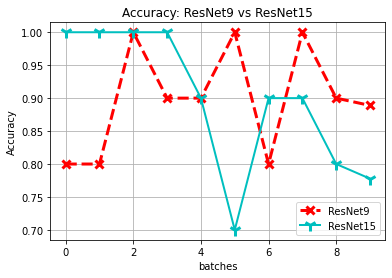

In [10]:
plt.plot(accuracy9, 'r--x', markersize=8, markeredgewidth=3
         , linewidth=3,label='ResNet9')
plt.plot(accuracy15, 'c-1', markersize=12, markeredgewidth=3
         , linewidth=2,label='ResNet15')
plt.grid()
plt.title('Accuracy: ResNet9 vs ResNet15')
plt.xlabel('batches')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
